
# Use Case 1

## contents

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Exploratory Data Analysis</a>
3. <a href="#3">Select features to build the model</a>
4. <a href="#4">Training and test datasets</a>
5. <a href="#6">Train, tune, and test a classifier</a>




## 1. <a name="1">Read the dataset</a>


In [ ]:
import numpy as np               
import pandas as pd
import os                 
import sys                                        

import matplotlib.pyplot as plt   
from IPython.display import Image                 
from IPython.display import display               
from sklearn.datasets import dump_svmlight_file   
from time import gmtime, strftime                 
import math                                       
import json


In [ ]:
%%capture 
# download the xls dataset
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=18hJmF38KIYuXW3Ab5oiEDw_BuWgIchih' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=18hJmF38KIYuXW3Ab5oiEDw_BuWgIchih" -O credit_card_clients.xls && rm -rf /tmp/cookies.txt



## 2. <a name="2">Exploratory Data Analysis</a>



In [ ]:
df = pd.read_excel('credit_card_clients.xls', header = 1)
print('The shape of the training dataset is:', df.shape)
df.head(10)

The shape of the training dataset is: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,male,graduate school,single,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,male,graduate school,single,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,female,university,single,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,female,others,married,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,male,high school,single,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [ ]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [ ]:
#drop duplicates and nulls 
df.dropna(axis = 0, how = 'any', inplace = True) 
df.drop_duplicates(subset = ['ID'], inplace = True) 

In [ ]:
# This will print basic statistics for numerical columns
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29351.000000,29351.000000,29351.000000,29351.00000,29351.000000,29351.000000,29351.000000,29351.000000,29351.000000,29351.000000,29351.000000,2.935100e+04,29351.000000,29351.000000,29351.000000,29351.000000,2.935100e+04,29351.000000,29351.000000,29351.000000,29351.000000,29351.000000
mean,14987.993765,168270.031004,35.424244,-0.01741,-0.133215,-0.165923,-0.221015,-0.265953,-0.290280,50981.534939,48987.296515,4.685549e+04,43196.697728,40308.864672,38915.298559,5639.660966,5.870514e+03,5187.081905,4821.544343,4796.015298,5193.879868,0.222343
std,8658.506676,129978.839521,9.495480,1.12609,1.200839,1.200595,1.172474,1.137168,1.152862,73457.706806,71029.261051,6.923258e+04,64315.255250,60809.903678,59605.713552,15842.478777,2.205772e+04,16846.579800,15350.441039,15159.798191,17663.562225,0.415828
min,1.000000,10000.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7501.500000,50000.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3483.000000,2938.000000,2.606000e+03,2303.000000,1760.500000,1263.000000,991.000000,8.145000e+02,390.000000,291.000000,259.000000,130.000000,0.000000
50%,14982.000000,140000.000000,34.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22206.000000,21041.000000,2.002700e+04,19005.000000,18078.000000,17080.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1501.000000,1500.000000,0.000000
75%,22481.500000,240000.000000,41.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,66685.000000,63640.000000,5.987650e+04,54425.500000,50225.000000,49276.500000,5007.000000,5.000000e+03,4505.000000,4027.000000,4077.500000,4001.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,426529.000000,528666.000000,1.000000


#### Target distribution

Let's check our target distribution.

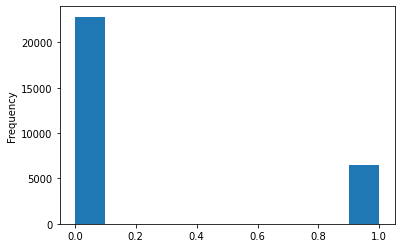

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

df['default payment next month'].plot.hist()
plt.show()

We can see from the target plot above that we are dealing with an imbalanced dataset. This means one result type is dominating the other one(s). But this is a regression model, and no issue for this data set

In [ ]:
df = df.query("EDUCATION != 0 and MARRIAGE != 0")

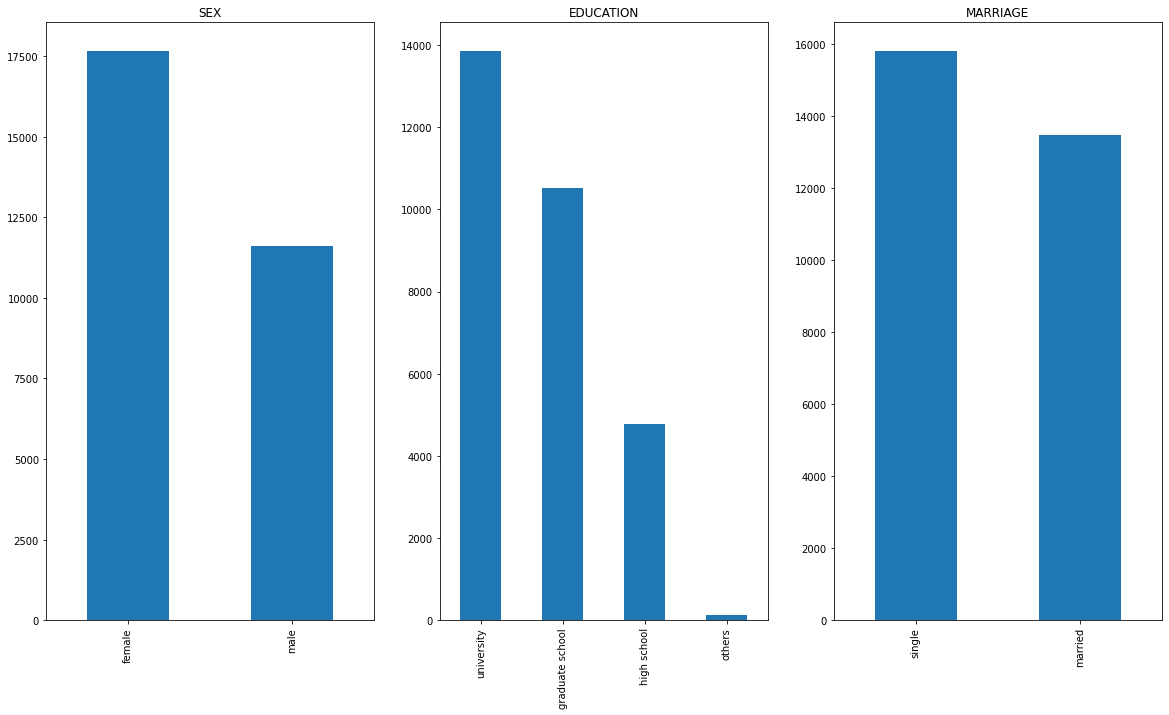

In [ ]:
plt.figure(figsize = (20, 11))
object_cols = df.select_dtypes(include= 'object')
num_object_cols = len(num_cols.columns)
current = 1



while current <= num_object_cols : 
  col = object_cols.columns[current-1]
  stats = object_cols[col].value_counts()
  plt.subplot(1, num_object_cols, current)
  stats.plot(kind = 'bar')
  plt.title(col)
  current += 1



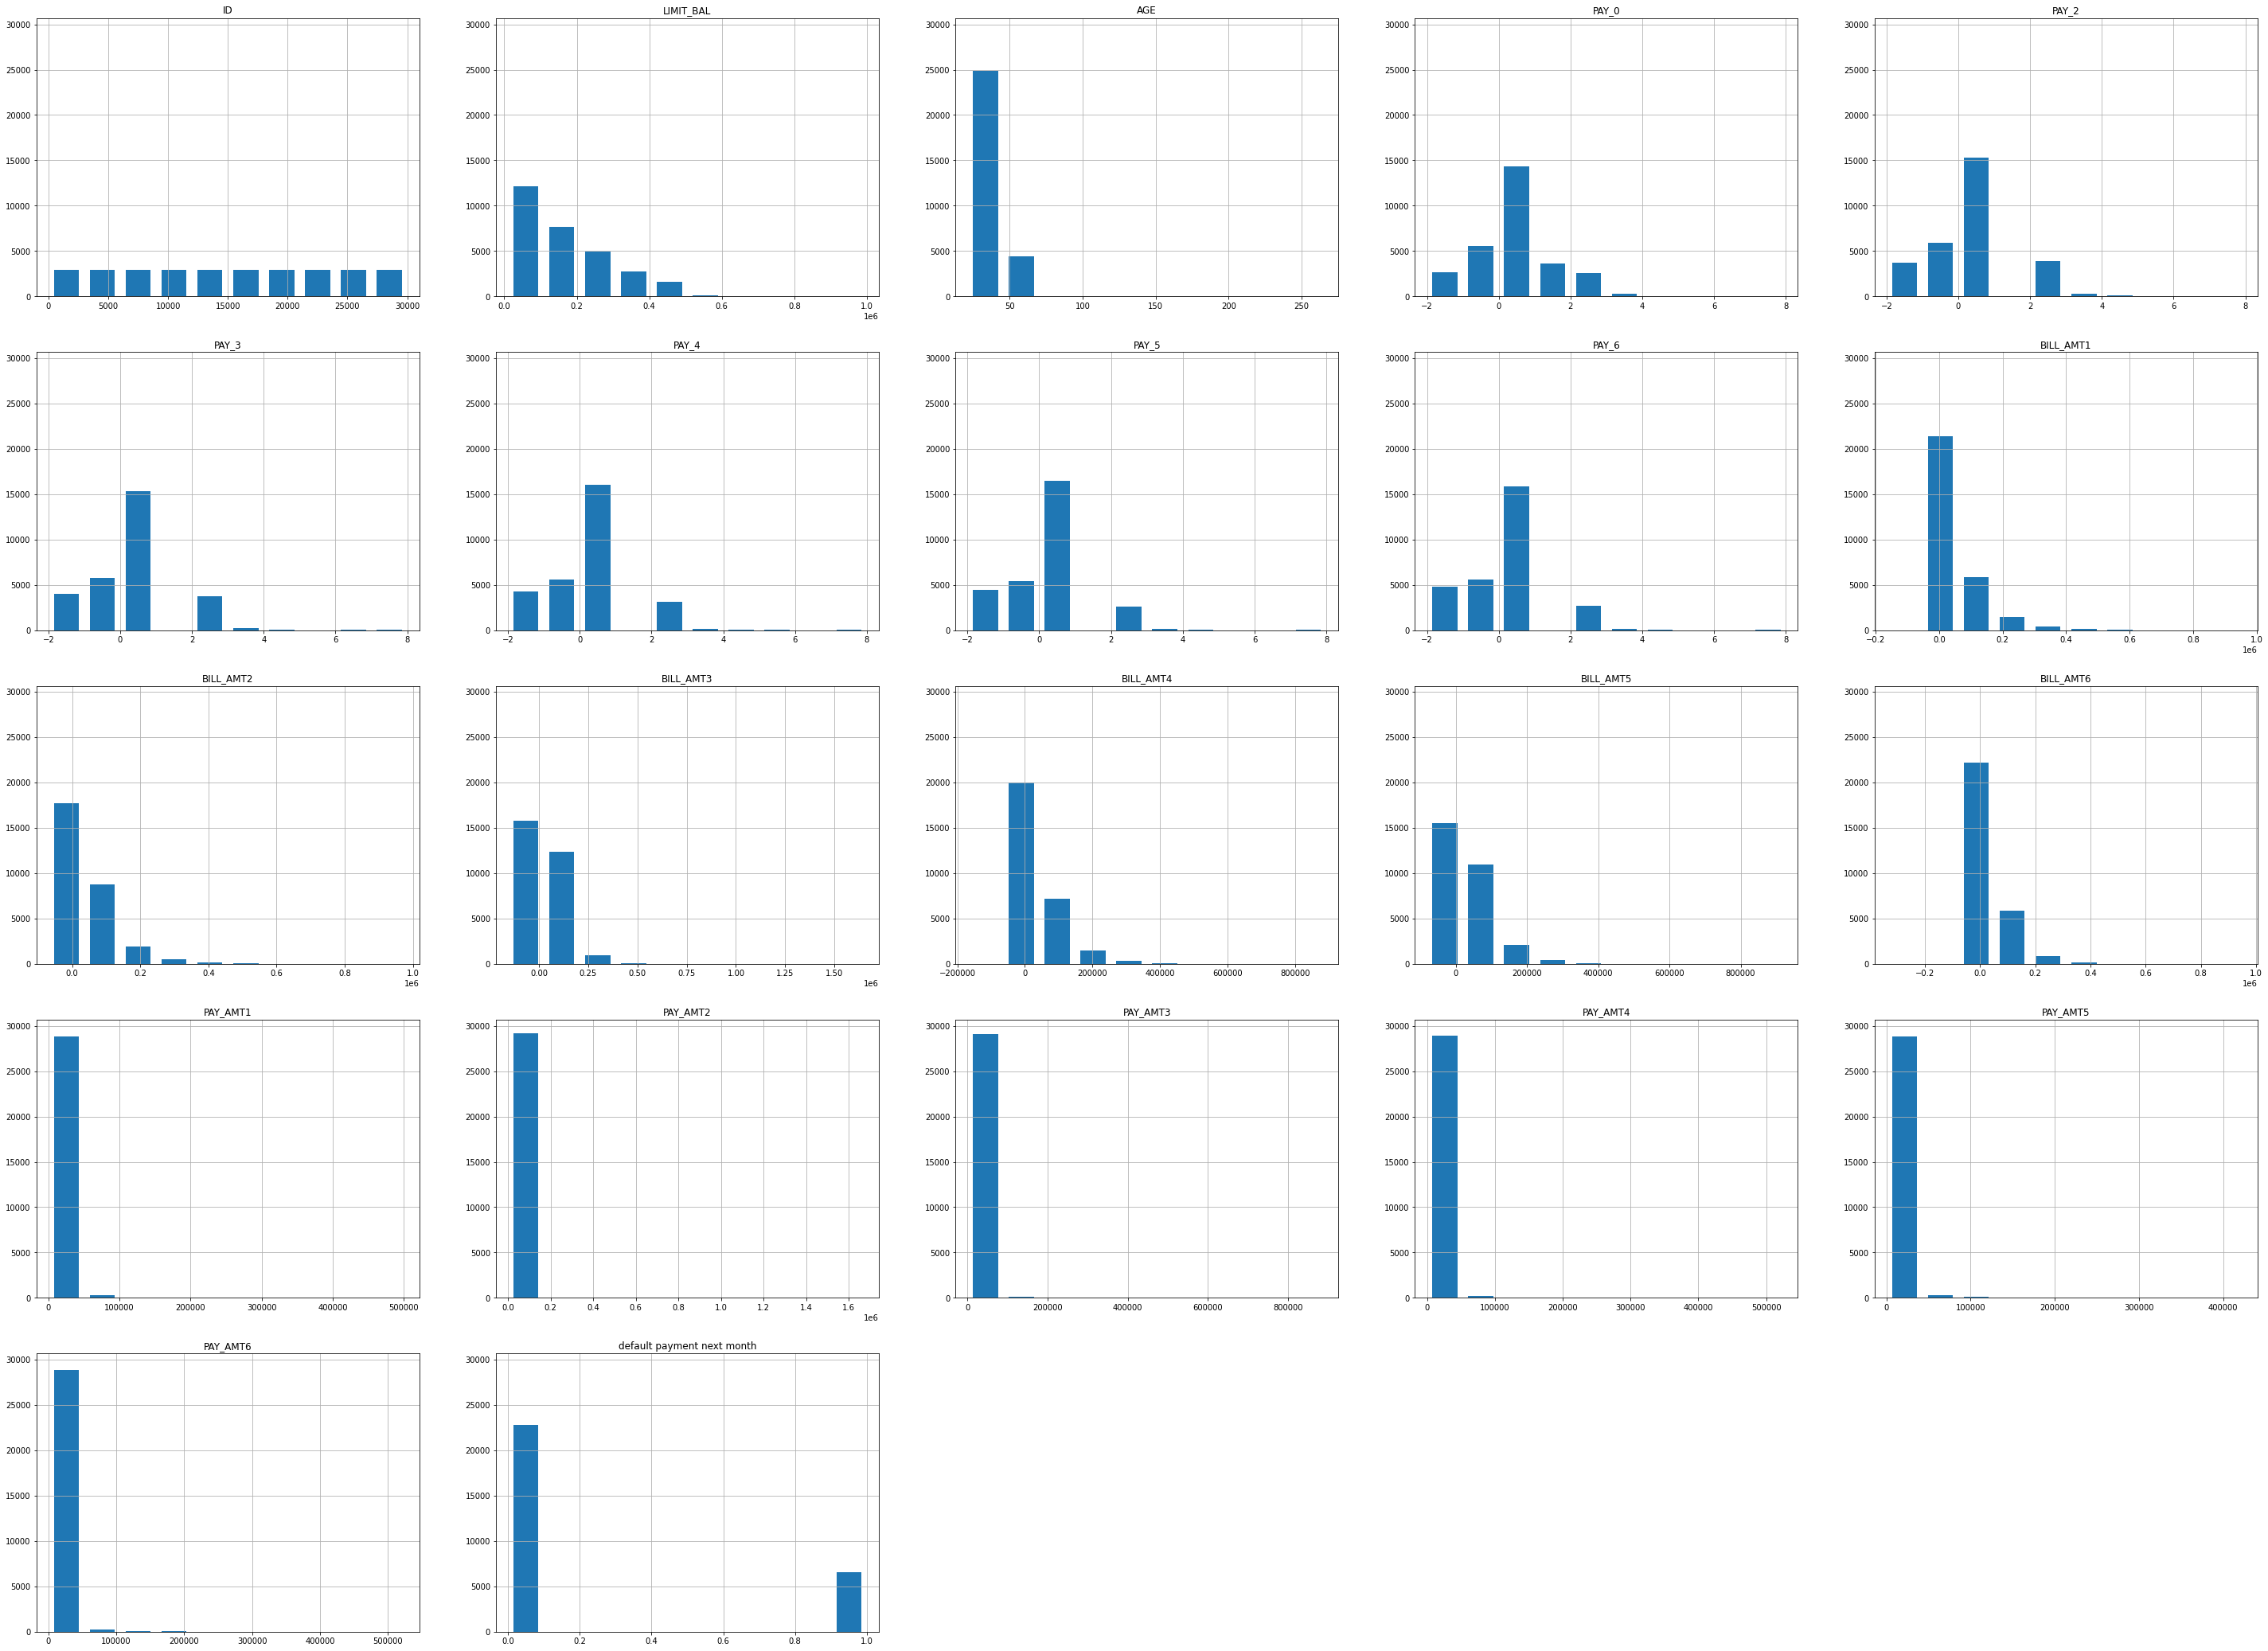

In [ ]:
plt.figure(figsize = (50, 45))
numeric_cols = df.select_dtypes(include= np.int64)
num_numeric_cols = len(numeric_cols.columns)
current = 1

cols = num_numeric_cols // 4 
rows = int(4 + (num_numeric_cols%4))
prev_ax = plt.gca()

while current <= num_numeric_cols : 
  col = numeric_cols.columns[current-1]
  stats = numeric_cols[col].value_counts()

  plt.subplot(rows, cols, current, sharey = prev_ax)

  df[col].hist(rwidth = 0.7)
  plt.title(col)
  current += 1

In [ ]:
object_cols = df.select_dtypes(include= 'object')
object_col_names = [col+'_' for col in object_cols.columns]
onehot_object_cols = pd.get_dummies(object_cols, prefix = object_col_names) 
onehot_object_cols.head()

,SEX__female,SEX__male,EDUCATION__graduate school,EDUCATION__high school,EDUCATION__others,EDUCATION__university,MARRIAGE__married,MARRIAGE__single
0,1,0,0,0,0,1,1,0
1,1,0,0,0,0,1,0,1
2,1,0,0,0,0,1,0,1
3,1,0,0,0,0,1,1,0
4,0,1,0,0,0,1,1,0


In [ ]:
df.drop(object_cols.columns, axis = 1, inplace = True) 

for col in onehot_object_cols.columns :
  df[col] = onehot_object_cols[col]

df.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX__female,SEX__male,EDUCATION__graduate school,EDUCATION__high school,EDUCATION__others,EDUCATION__university,MARRIAGE__married,MARRIAGE__single
0,1,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,0,0,0,1,1,0
1,2,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,0,0,0,1,0,1
2,3,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,0,0,0,1,0,1
3,4,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,0,0,0,1,1,0
4,5,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,0,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29283 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          29283 non-null  int64
 1   LIMIT_BAL                   29283 non-null  int64
 2   AGE                         29283 non-null  int64
 3   PAY_0                       29283 non-null  int64
 4   PAY_2                       29283 non-null  int64
 5   PAY_3                       29283 non-null  int64
 6   PAY_4                       29283 non-null  int64
 7   PAY_5                       29283 non-null  int64
 8   PAY_6                       29283 non-null  int64
 9   BILL_AMT1                   29283 non-null  int64
 10  BILL_AMT2                   29283 non-null  int64
 11  BILL_AMT3                   29283 non-null  int64
 12  BILL_AMT4                   29283 non-null  int64
 13  BILL_AMT5                   29283 non-null  int64
 14  BILL_A

Text(0.5, 1.0, 'dataset correlation')

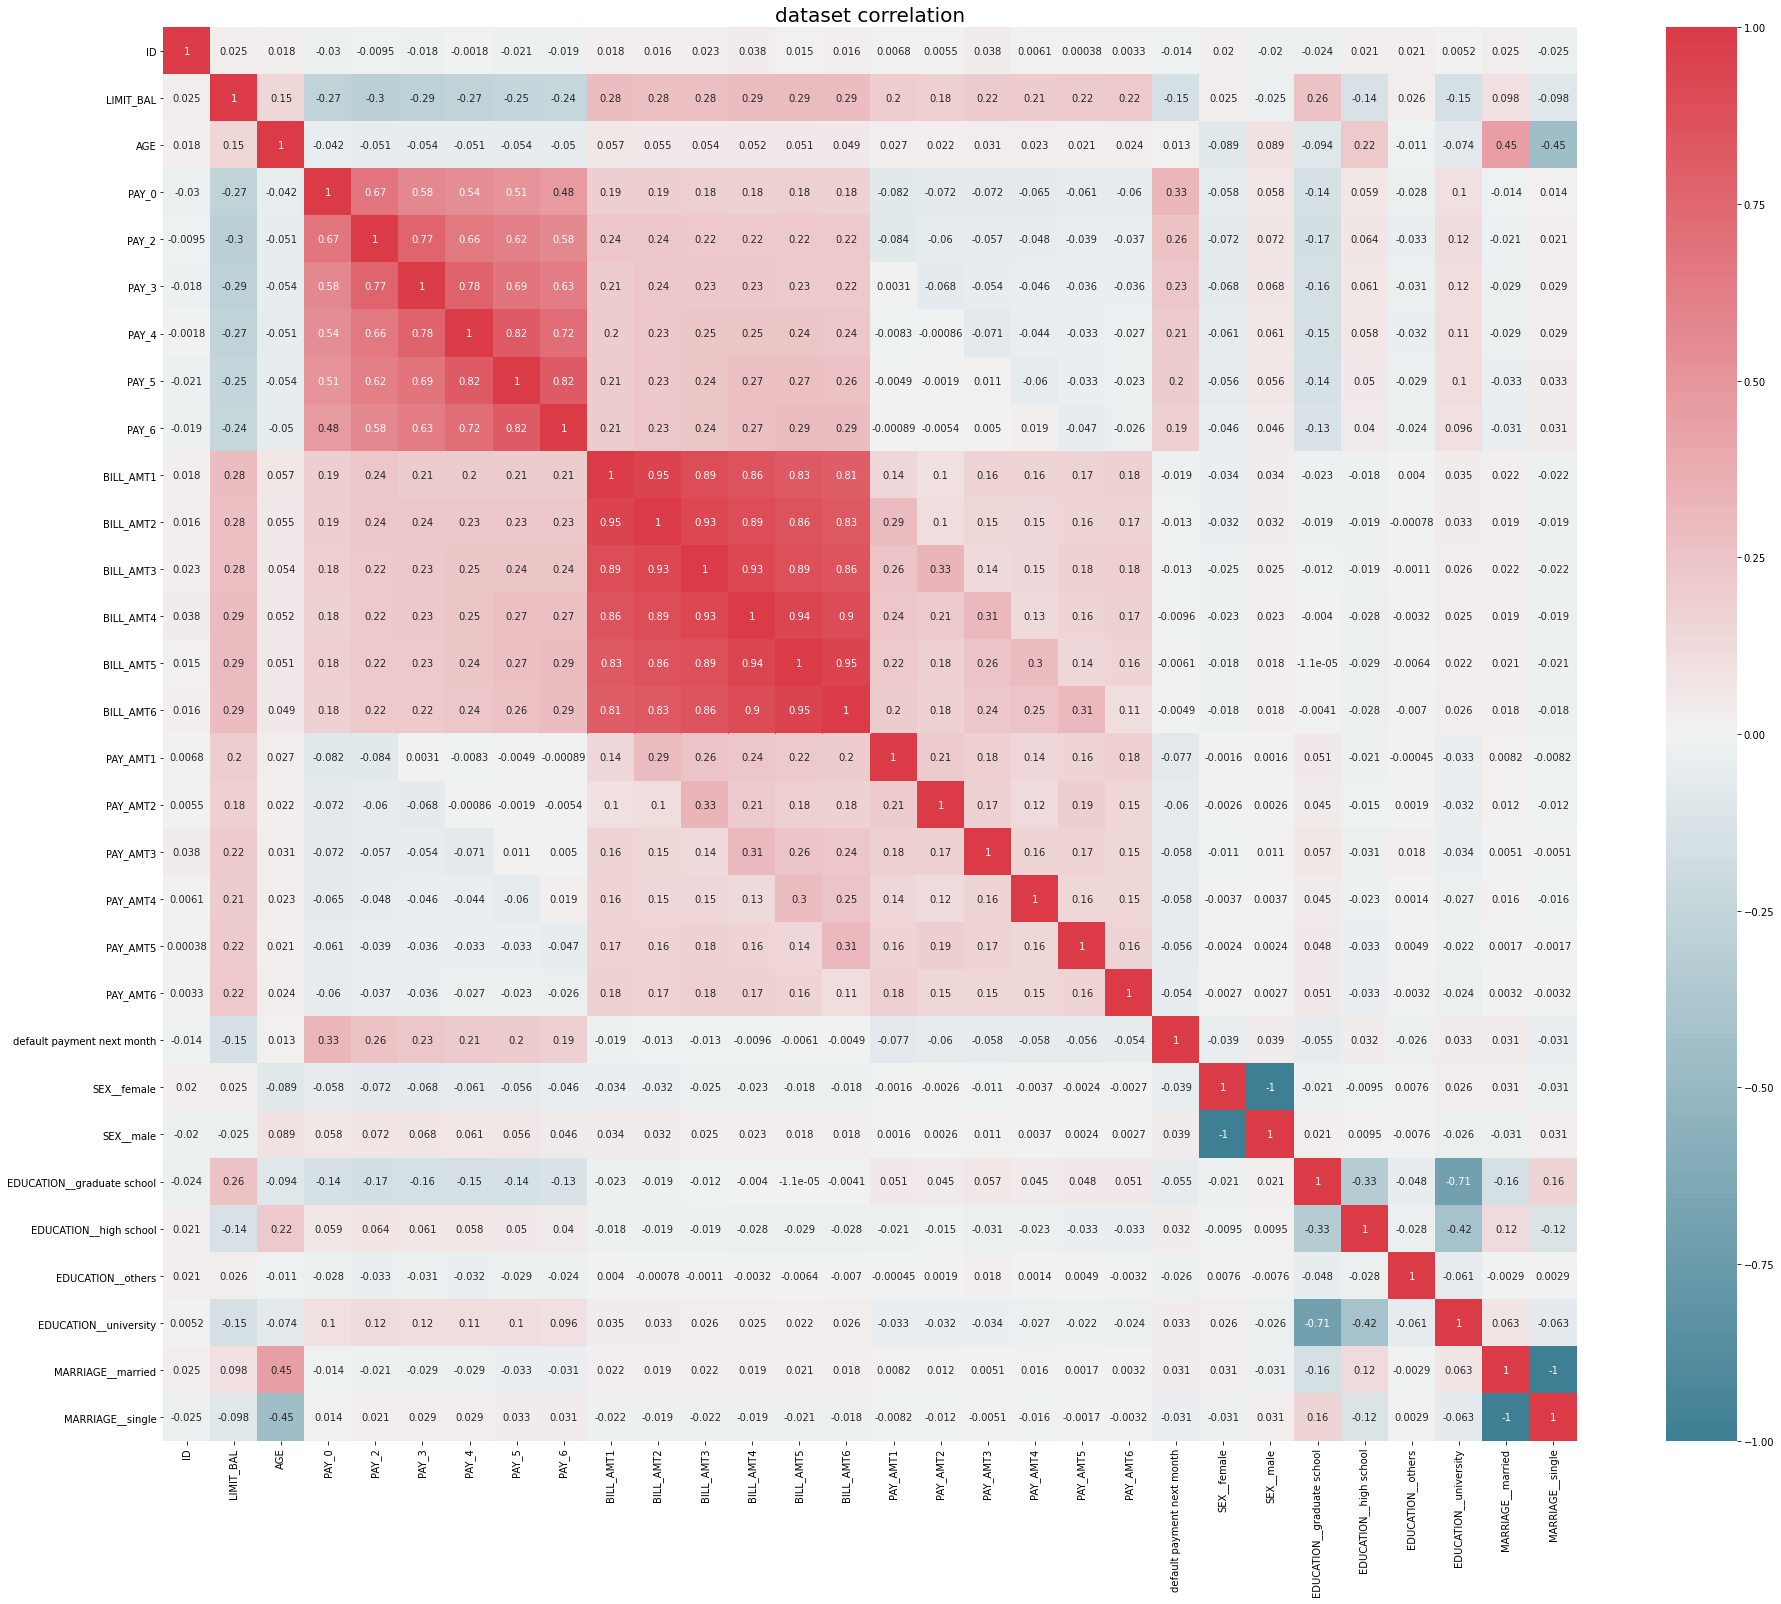

In [ ]:
# Display correlation after removing correlated features
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [ ]:

non_useful_features = ['ID']

label_feature = ['default_payment']

In [ ]:
#drop non necessary columns
df.drop(non_useful_features, axis = 1, inplace = True) 
df.rename(columns= {'default payment next month': 'default_payment'}, inplace = True) 

In [ ]:
df.nunique()

LIMIT_BAL                        81
AGE                              63
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22228
BILL_AMT2                     21863
BILL_AMT3                     21560
BILL_AMT4                     21108
BILL_AMT5                     20603
BILL_AMT6                     20212
PAY_AMT1                       7814
PAY_AMT2                       7773
PAY_AMT3                       7389
PAY_AMT4                       6839
PAY_AMT5                       6797
PAY_AMT6                       6849
default_payment                   2
SEX__female                       2
SEX__male                         2
EDUCATION__graduate school        2
EDUCATION__high school            2
EDUCATION__others                 2
EDUCATION__university             2
MARRIAGE__married           

## 3. <a name="3">Select features to build the model</a>


In [ ]:
all_features = df.columns
numeric_features = all_features

In [ ]:
label = 'defualt_payment'

#### checking for numerical features outliers

In [ ]:
for c in numeric_features:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))

LIMIT_BAL
(9009.999, 109000.0]     12127
(109000.0, 208000.0]      7687
(208000.0, 307000.0]      4967
(307000.0, 406000.0]      2719
(406000.0, 505000.0]      1580
(505000.0, 604000.0]       124
(604000.0, 703000.0]        56
(703000.0, 802000.0]        22
(802000.0, 901000.0]         0
(901000.0, 1000000.0]        1
Name: LIMIT_BAL, dtype: int64
AGE
(20.753, 45.6]    24829
(45.6, 70.2]       4432
(70.2, 94.8]         15
(94.8, 119.4]         0
(119.4, 144.0]        2
(144.0, 168.6]        2
(168.6, 193.2]        0
(193.2, 217.8]        0
(217.8, 242.4]        2
(242.4, 267.0]        1
Name: AGE, dtype: int64
PAY_0
(-2.0109999999999997, -1.0]     8285
(-1.0, 0.0]                    14318
(0.0, 1.0]                      3616
(1.0, 2.0]                      2612
(2.0, 3.0]                       313
(3.0, 4.0]                        76
(4.0, 5.0]                        24
(5.0, 6.0]                        11
(6.0, 7.0]                         9
(7.0, 8.0]                        19
Name: 

In [ ]:
backup_df = df.copy()

In [ ]:
df[all_features] = df[all_features].astype('float32')

In [ ]:
df.isna().sum()

LIMIT_BAL                     0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment               0
SEX__female                   0
SEX__male                     0
EDUCATION__graduate school    0
EDUCATION__high school        0
EDUCATION__others             0
EDUCATION__university         0
MARRIAGE__married             0
MARRIAGE__single              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29283 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29283 non-null  float32
 1   AGE                         29283 non-null  float32
 2   PAY_0                       29283 non-null  float32
 3   PAY_2                       29283 non-null  float32
 4   PAY_3                       29283 non-null  float32
 5   PAY_4                       29283 non-null  float32
 6   PAY_5                       29283 non-null  float32
 7   PAY_6                       29283 non-null  float32
 8   BILL_AMT1                   29283 non-null  float32
 9   BILL_AMT2                   29283 non-null  float32
 10  BILL_AMT3                   29283 non-null  float32
 11  BILL_AMT4                   29283 non-null  float32
 12  BILL_AMT5                   29283 non-null  float32
 13  BILL_AMT6                   292

## 4. <a name="4">Training and test datasets</a>




In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)


In [ ]:
print("shape of train:{} valid:{} test:{}".format(train_data.shape, val_data.shape, test_data.shape))

shape of train:(23426, 29) valid:(4685, 29) test:(1172, 29)


## 5. <a name="6">Train and tune a classifier</a>



In [ ]:
train_data.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,SEX__female,SEX__male,EDUCATION__graduate school,EDUCATION__high school,EDUCATION__others,EDUCATION__university,MARRIAGE__married,MARRIAGE__single
2067,80000.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,75454.0,77738.0,77235.0,76835.0,34751.0,0.0,4100.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
16166,20000.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,17287.0,13864.0,14534.0,9662.0,8091.0,0.0,1572.0,1242.0,1020.0,2000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
27642,80000.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,78366.0,67801.0,68034.0,55674.0,48649.0,47041.0,2540.0,2442.0,1810.0,1661.0,1668.0,1663.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15646,310000.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,52439.0,44350.0,34608.0,21262.0,11944.0,-2571.0,2042.0,1562.0,1118.0,1139.0,2195.0,61526.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4544,150000.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,146277.0,127679.0,73323.0,74783.0,76360.0,77868.0,3952.0,2614.0,2631.0,2735.0,2740.0,2720.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
train_cols = train_data.columns 

train_x = train_data.drop(label_feature, axis =1)
train_y = train_data[label_feature]

val_x = val_data.drop(label_feature, axis = 1) 
val_y = val_data[label_feature] 

test_x = test_data.drop(label_feature, axis = 1) 
test_y = test_data[label_feature]

print("train_x:{} train_y:{}".format(train_x.shape, train_y.shape))
print("val_x:{} val_y:{}".format(val_x.shape, val_y.shape)) 
print("test_x:{} test_y:{}".format(test_x.shape, test_y.shape))

train_x:(23426, 28) train_y:(23426, 1)
val_x:(4685, 28) val_y:(4685, 1)
test_x:(1172, 28) test_y:(1172, 1)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


regressor = RandomForestClassifier(n_estimators = 100, random_state = 0) 

regressor.fit(train_x, train_y) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
true_train_y = np.array(train_y)[:,0]
true_val_y = np.array(val_y)[:,0]
true_test_y = np.array(test_y)[:,0]

[[18185     8]
 [    7  5226]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18193
         1.0       1.00      1.00      1.00      5233

    accuracy                           1.00     23426
   macro avg       1.00      1.00      1.00     23426
weighted avg       1.00      1.00      1.00     23426

Accuracy (training): 0.9993596858191752


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


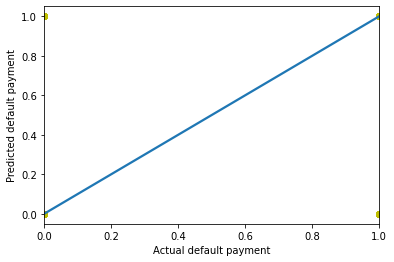

In [ ]:
train_predictions = regressor.predict(train_x)

print(confusion_matrix(true_train_y, train_predictions))
print(classification_report(true_train_y, train_predictions))
print("Accuracy (training):", accuracy_score(true_train_y, train_predictions))

sb.regplot(true_train_y, train_predictions, scatter_kws={'alpha':1, 'color':'y'})
plt.xlabel('Actual default payment')
plt.ylabel('Predicted default payment')
plt.show()

[[3463  189]
 [ 650  383]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      3652
         1.0       0.67      0.37      0.48      1033

    accuracy                           0.82      4685
   macro avg       0.76      0.66      0.68      4685
weighted avg       0.80      0.82      0.80      4685

Accuracy (validation): 0.8209178228388474


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


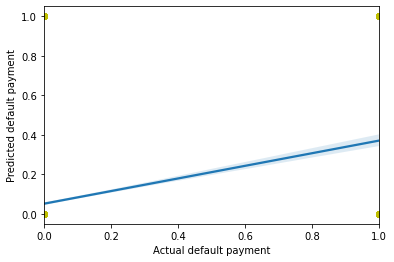

In [ ]:
val_predictions = regressor.predict(val_x)

print(confusion_matrix(true_val_y, val_predictions))
print(classification_report(true_val_y, val_predictions))
print("Accuracy (validation):", accuracy_score(true_val_y, val_predictions))

sb.regplot(true_val_y, val_predictions, scatter_kws={'alpha':1, 'color':'y'})
plt.xlabel('Actual default payment')
plt.ylabel('Predicted default payment')
plt.show()

[[852  65]
 [151 104]]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       917
         1.0       0.62      0.41      0.49       255

    accuracy                           0.82      1172
   macro avg       0.73      0.67      0.69      1172
weighted avg       0.80      0.82      0.80      1172

Accuracy (testing): 0.8156996587030717


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


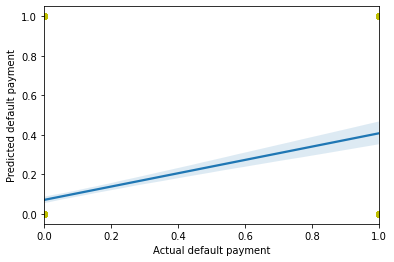

In [ ]:
test_predictions = regressor.predict(test_x)

print(confusion_matrix(true_test_y, test_predictions))
print(classification_report(true_test_y, test_predictions))
print("Accuracy (testing):", accuracy_score(true_test_y, test_predictions))

sb.regplot(true_test_y, test_predictions, scatter_kws={'alpha':1, 'color':'y'})
plt.xlabel('Actual default payment')
plt.ylabel('Predicted default payment')
plt.show()